# Analyse et Préparation des Données

### Chargement des Données

In [41]:
import pandas as pd

df = pd.read_csv('assurance-maladie.csv')

df.info()
   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##  Analyse exploratoire des données (EDA)

###  structure générale du jeu de données

In [32]:
print(df.dtypes)

print("\n")

print("Dimensions:", df.shape)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

print("\n")

print(df.head())
print("\n")
print(df.tail())
print("\n")
print(df.sample(5))

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


Dimensions: (1338, 7)
Number of rows: 1338
Number of columns: 7


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603




###  analyse descriptive des données

In [59]:
print("Les moyennes des données numériques sont: \n", df.describe().loc['mean'])
print('\n')
print("Les médianes des données numériques sont: \n",df[['age','bmi','children','charges']].median())
print('\n')
print("Les écarts-type des données numériques sont: \n", df.describe().loc['std'])
print('\n')
print("Les fréquences des sexes sont: \n", df['sex'].value_counts())
print('\n')
print("Les fréquences des fumeurs et non-femeurs sont: \n", df['smoker'].value_counts())
print('\n')
print("Les fréquences des régions sont: \n", df['region'].value_counts())

Les moyennes des données numériques sont: 
 age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
Name: mean, dtype: float64


Les médianes des données numériques sont: 
 age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64


Les écarts-type des données numériques sont: 
 age            14.049960
bmi             6.098187
children        1.205493
charges     12110.011237
Name: std, dtype: float64


Les fréquences des sexes sont: 
 sex
male      676
female    662
Name: count, dtype: int64


Les fréquences des fumeurs et non-femeurs sont: 
 smoker
no     1064
yes     274
Name: count, dtype: int64


Les fréquences des régions sont: 
 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


On observe que la moyenne des charges (13 270,42) est nettement supérieure à la médiane (9 382,03).
Cela indique une distribution asymétrique à droite (right-skewed), ce qui signifie que certaines valeurs très élevées (des valeurs aberrantes) tirent la moyenne vers le haut.
Autrement dit, il existe des individus dont les frais médicaux sont exceptionnellement élevés, ce qui influence la moyenne globale.

De plus, l’écart-type élevé (12 110,01) révèle une forte dispersion des charges dans l’ensemble de la population étudiée. Cela traduit une grande hétérogénéité des profils en termes de dépenses de santé.

On observe aussi, qu'il y a une variabilité importante dans les âges, avec des individus qui peuvent être significativement plus jeunes ou plus âgés que la moyenne

In [ ]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### Il n'ya pas de valeurs manquantes

In [68]:
print(df.duplicated().sum())

1


### Il y a une seule ligne dupliquée

In [115]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19.0,male,30.59,0.0,no,northwest,1639.5631


### Distributions des variables numériques

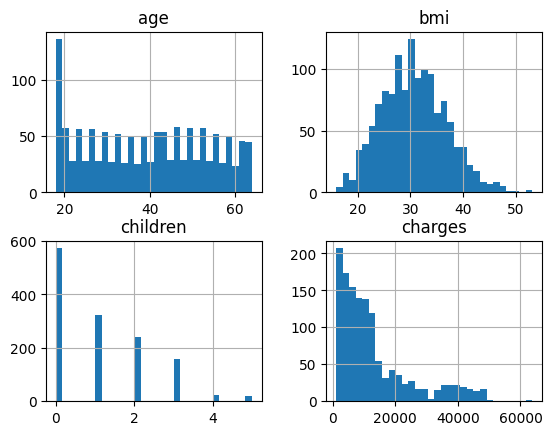

In [126]:
import  matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=30)
plt.show()

### Matrice de corrélation et heatmap

               age  children   charges       bmi
age       1.000000  0.042469  0.299008  0.109272
children  0.042469  1.000000  0.067998  0.012759
charges   0.299008  0.067998  1.000000  0.198341
bmi       0.109272  0.012759  0.198341  1.000000


<Axes: >

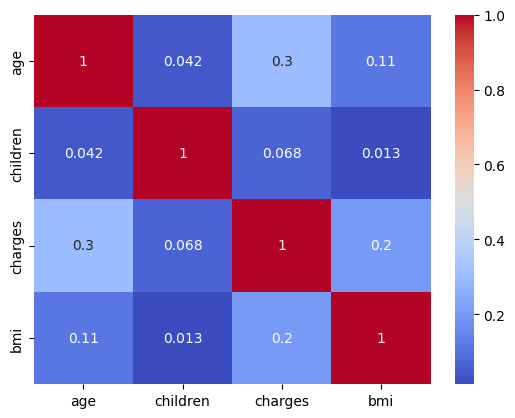

In [104]:
corr_matrix = df[['age','children','charges','bmi']].corr()

print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

### Pairplots

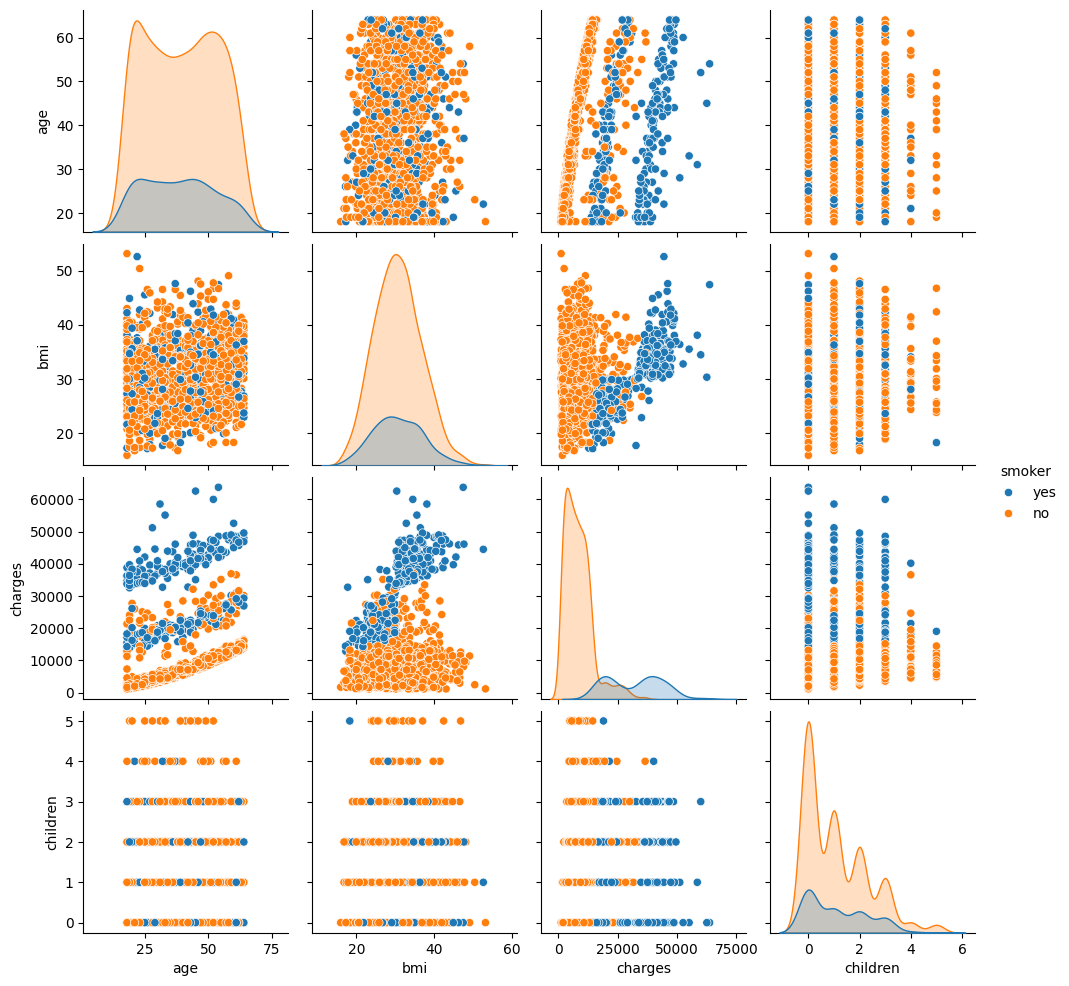

In [158]:
sns.pairplot(df[['age', 'bmi', 'charges', 'children', 'smoker']], hue='smoker')
plt.show()

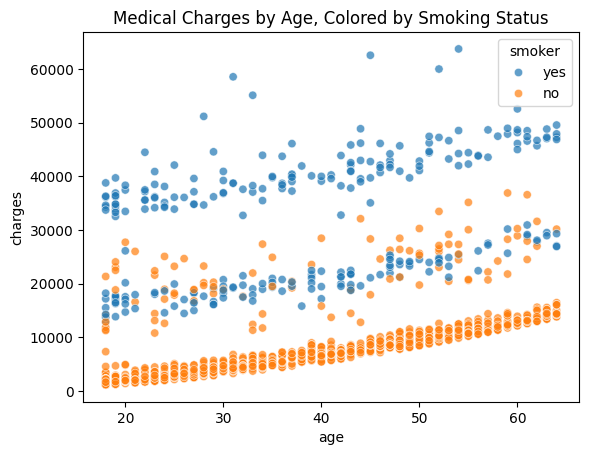

In [ ]:

sns.scatterplot(data=df, x='age', y='charges', hue='smoker', alpha=0.7)


plt.title('Medical Charges by Age, Colored by Smoking Status')


plt.show()

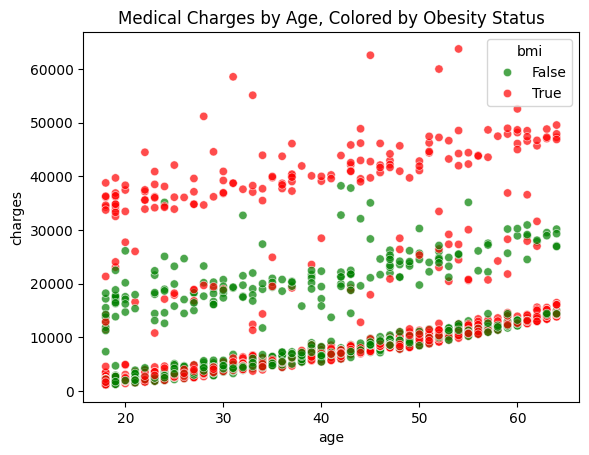

In [132]:
sns.scatterplot(data=df, x='age', y='charges', hue=df['bmi'] > 30, alpha=0.7, palette={True: 'red', False:'green'})

plt.title('Medical Charges by Age, Colored by Obesity Status')

plt.show()


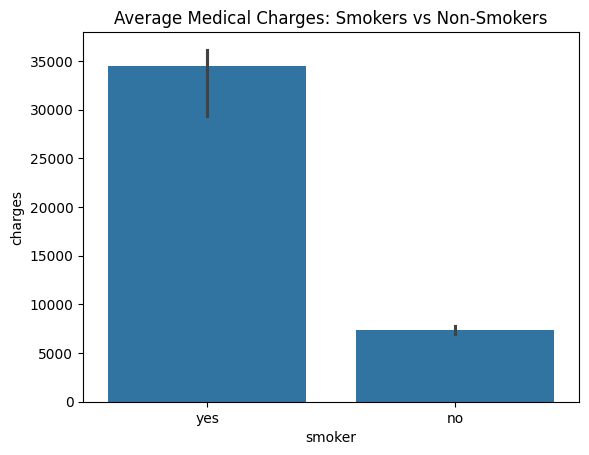

In [148]:
sns.barplot(data=df, x='smoker', y='charges', estimator='median')
plt.title('Average Medical Charges: Smokers vs Non-Smokers')
plt.show()

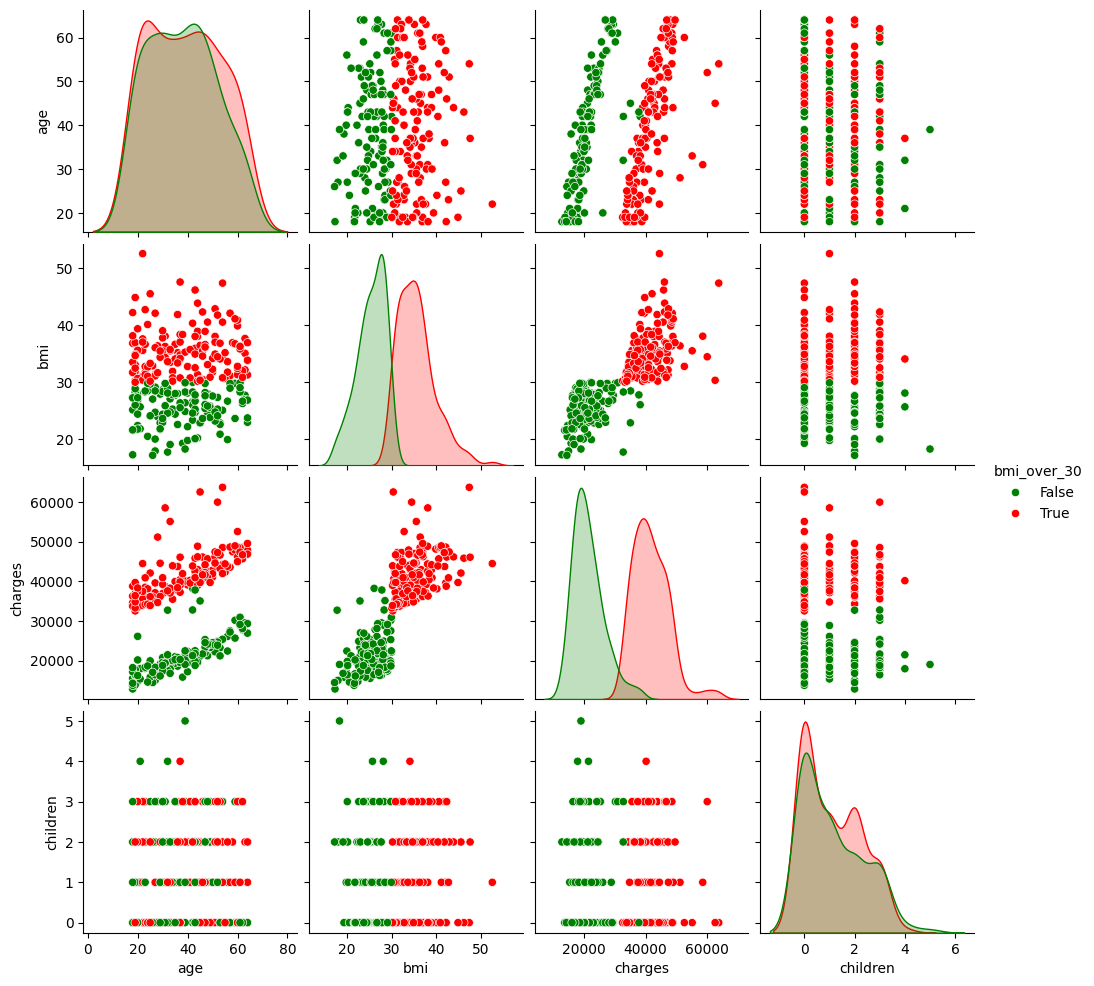

In [161]:
sns.pairplot(
    df[df['smoker'] == 'yes'].assign(bmi_over_30=lambda x: x['bmi'] > 30)[
        ['age', 'bmi', 'charges', 'children', 'bmi_over_30']
    ], 
    hue='bmi_over_30', palette={True:'red',False:'green'}
)
plt.show()


### Gestion des valeurs manquantes 

In [110]:
from sklearn.impute import SimpleImputer

df[['age','bmi','children','charges']] = SimpleImputer(strategy='median').fit_transform(df[['age','bmi','children','charges']])
df[['sex','smoker','region']] = SimpleImputer(strategy='most_frequent').fit_transform(df[['sex','smoker','region']])


### Suppression des doublons

In [162]:
df.drop_duplicates(inplace = True)

df.to_csv('assurance-maladie-clean.csv', index=False)

### Détection et gestion des valeurs aberrantes

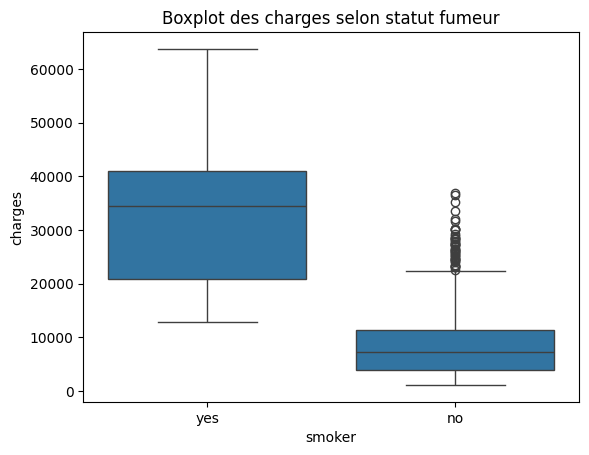

In [174]:
sns.boxplot(y=df['charges'],x=df['smoker'])
plt.title("Boxplot des charges selon statut fumeur")
plt.show()


In [ ]:
numerical_cols = ['age', 'bmi', 'charges','children']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df.to_csv('assurance-maladie-clean.csv', index=False)

### Encodage des variables catégoriques 

In [207]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_smoker = LabelEncoder()


df = pd.read_csv('assurance-maladie.csv')

df['sex'] = le_sex.fit_transform(df['sex'])
df['smoker'] = le_smoker.fit_transform(df['smoker'])
df = pd.get_dummies(df, columns=['region'],dtype='int')


df.to_csv('assurance-maladie-clean.csv', index=False)

### Diviser les données en ensembles d'entraînement et de test

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size =0.2, random_state=42
)

### Application d'une standardisation sur les variables numériques 

In [210]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

X_train_std = standard_scaler.fit_transform(X_train)
X_test_std = standard_scaler.transform(X_test)

### Entrainement des modèles

In [216]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [221]:
LinearRegression().fit(X_train, y_train).score(X_test, y_test)

0.7835929767120723

In [222]:
RandomForestRegressor().fit(X_train, y_train).score(X_test, y_test)

0.8596005066330987

In [223]:
XGBRegressor().fit(X_train, y_train).score(X_test, y_test)

0.8511130579716937

In [ ]:
SVR().fit(X_train, y_train).score(X_test, y_test)


-0.07245515281828974